# Нейронные сети с Keras
Keras -- простая библиотека для написания нейронных сетей. Keras не позволяет строить сложные модели со специфическими функциями потерь, но зато удобен в использовании. Синтаксис Keras напоминает синтаксис sklearn.

In [1]:
import numpy as np
import keras, keras.layers as L
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

Using TensorFlow backend.


### Введение
Основной класс для работы с керасом -- модель Sequential. В модель можно последовательно добавлять слои нейронной сети. 

После добавления всех слоёв можно вызвать model.compile, указав в аргументах функцию потерь, оптимизатор и метрику, которую необходимо считать при оптиимзации.

Функция .summary выводит информацию о нейронной сети.

In [2]:
model = keras.models.Sequential()
model.add(L.InputLayer(input_shape=[64]))
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0723 13:05:16.434127 139787691173760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 13:05:16.483586 139787691173760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 13:05:16.492871 139787691173760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 13:05:16.515692 139787691173760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 13:05:16.531099 139787691173760 deprecation_wrappe

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________


Обучим модель на датасете digits. 

0

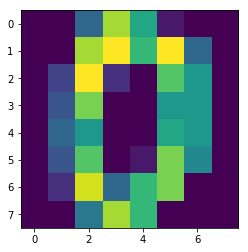

In [4]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

X, y = load_digits(return_X_y=True)

plt.imshow(X[0].reshape((8,8)))

y[0]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

W0723 13:07:02.928800 139787691173760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1437 samples, validate on 360 samples
Epoch 1/100
1437/1437 [==============================] - 5s 3ms/step - loss: 3.6858 - acc: 0.3862 - val_loss: 0.8977 - val_acc: 0.7417
Epoch 2/100
1437/1437 [==============================] - 0s 87us/step - loss: 0.4988 - acc: 0.8434 - val_loss: 0.3691 - val_acc: 0.8889
Epoch 3/100
1437/1437 [==============================] - 0s 97us/step - loss: 0.2489 - acc: 0.9332 - val_loss: 0.2583 - val_acc: 0.9278
Epoch 4/100
1437/1437 [==============================] - 0s 94us/step - loss: 0.1797 - acc: 0.9485 - val_loss: 0.2213 - val_acc: 0.9417
Epoch 5/100
1437/1437 [==============================] - 0s 95us/step - loss: 0.1408 - acc: 0.9610 - val_loss: 0.2039 - val_acc: 0.9361
Epoch 6/100
1437/1437 [==============================] - 0s 89us/step - loss: 0.1064 - acc: 0.9715 - val_loss: 0.1726 - val_acc: 0.9472
Epoch 7/100
1437/1437 [==============================] - 0s 96us/step - loss: 0.0827 - acc: 0.9777 - val_loss: 0.1713 - val_acc: 0.9472
Ep

### Обобщающая способность нейронной сети
Визуализируем предсказания нейронной сети на простой задаче восстановления одномерной зависимости. 

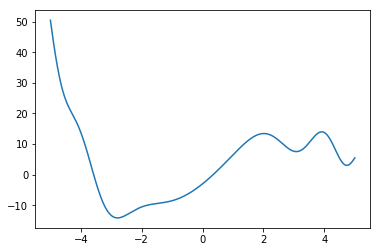

In [7]:
X = np.linspace(-5, 5, 1000)
y = 0.05 * X ** 4 - 0.5 * X ** 3 + 8 * X - 3 + 4 * np.sin(X**2 / 2)
plt.plot(X,y)

Подберём нейронную сеть, хорошо приближающую нашу функцию.

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([1]))
model.add(L.Dense(50, activation='relu'))
model.add(L.Dense(50, activation='sigmoid'))
model.add(L.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
model.fit(X,y, epochs=300, validation_split=0.2, shuffle=True)

Train on 800 samples, validate on 200 samples
Epoch 1/300
800/800 [==============================] - 0s 104us/step - loss: 0.4037 - val_loss: 13.5757
Epoch 2/300
800/800 [==============================] - 0s 100us/step - loss: 0.3978 - val_loss: 13.5702
Epoch 3/300
800/800 [==============================] - 0s 93us/step - loss: 0.4288 - val_loss: 13.5877
Epoch 4/300
800/800 [==============================] - 0s 101us/step - loss: 0.4040 - val_loss: 13.5589
Epoch 5/300
800/800 [==============================] - 0s 94us/step - loss: 0.4133 - val_loss: 13.6081
Epoch 6/300
800/800 [==============================] - 0s 96us/step - loss: 0.3835 - val_loss: 13.6083
Epoch 7/300
800/800 [==============================] - 0s 90us/step - loss: 0.4131 - val_loss: 13.6188
Epoch 8/300
800/800 [==============================] - 0s 91us/step - loss: 0.3744 - val_loss: 13.6307
Epoch 9/300
800/800 [==============================] - 0s 98us/step - loss: 0.3830 - val_loss: 13.6369
Epoch 10/300
800/800 [==

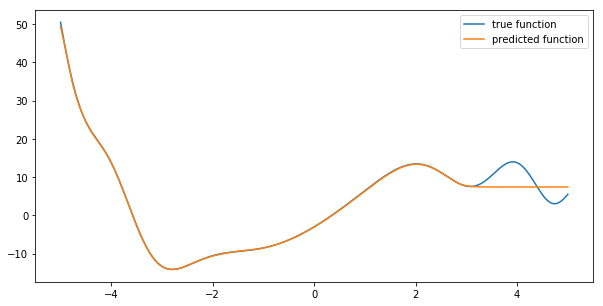

In [12]:
plt.figure(figsize=(10,5))
plt.plot(X,y, label='true function')
plt.plot(X, model.predict(X), label='predicted function')
plt.legend()
plt.show()

### Как выстрелить себе в ногу с Keras

* __Задача:__ Предсказать цену дома в $mil
* __Вход:__ 39 признаков этого дома

In [0]:
model = keras.models.Sequential()

model.add(L.InputLayer([39]))
model.add(L.Dense(128, activation='relu', kernel_initializer=keras.initializers.zeros())) 
model.add(L.Dense(128, activation='relu', kernel_initializer=keras.initializers.zeros())) 
model.add(L.Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error') 

* __Задача:__ Распознать рукописную цифру (0-9)
* __Вход:__ картинка 28 x 28 пикселей (ч/б)

In [0]:
model = keras.models.Sequential()

model.add(L.InputLayer([28, 28, 1]))

model.add(L.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(L.Activation('relu'))
model.add(L.MaxPool2D(pool_size=(2, 2)))
model.add(L.Flatten())

model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))

model.add(L.Dense(10))
model.add(L.Activation('softmax'))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

* __Задача:__ классификация одежды (10 классов)
* __Вход:__ картинка RGB 100 x 100 пикселей

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([100, 100, 3]))

for filters in [32, 64, 128]:
    model.add(L.Conv2D(filters, kernel_size=(5, 5)))
    model.add(L.MaxPooling2D(pool_size=(3, 3)))
    model.add(L.Activation('relu'))
    model.add(L.BatchNormalization())

model.add(L.Flatten())

model.add(L.Dense(100, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
activation_8 (Activation)    (None, 9, 9, 64)          0         
__________

### Обучение нейронной сети на примере датасета cifar10

In [17]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

170500096/170498071 [==============================] - 14s 0us/step
(40000, 32, 32, 3) (40000, 1)


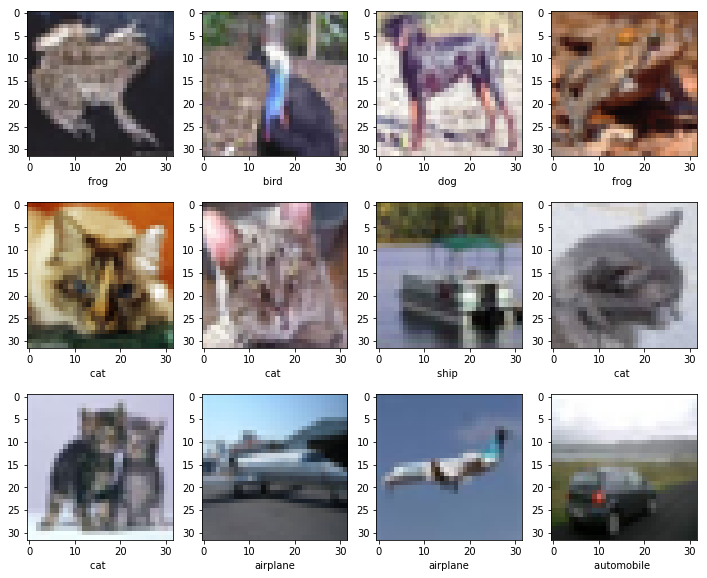

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

Нормировка:

In [0]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [0]:
model = keras.models.Sequential()

model.add(L.InputLayer(input_shape=[32,32,3]))
model.add(L.Flatten())
model.add(L.Dense(300, activation='relu'))
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=7, validation_data=[X_val, y_val])

Train on 40000 samples, validate on 10000 samples
Epoch 1/7
40000/40000 [==============================] - 6s 151us/step - loss: 1.8954 - acc: 0.3175 - val_loss: 1.7944 - val_acc: 0.3530
Epoch 2/7
40000/40000 [==============================] - 5s 130us/step - loss: 1.7207 - acc: 0.3838 - val_loss: 1.6935 - val_acc: 0.3924
Epoch 3/7
40000/40000 [==============================] - 5s 128us/step - loss: 1.6454 - acc: 0.4129 - val_loss: 1.6038 - val_acc: 0.4244
Epoch 4/7
40000/40000 [==============================] - 5s 127us/step - loss: 1.5932 - acc: 0.4307 - val_loss: 1.7008 - val_acc: 0.3794
Epoch 5/7
40000/40000 [==============================] - 5s 127us/step - loss: 1.5562 - acc: 0.4447 - val_loss: 1.5566 - val_acc: 0.4400
Epoch 6/7
40000/40000 [==============================] - 5s 128us/step - loss: 1.5236 - acc: 0.4575 - val_loss: 1.5460 - val_acc: 0.4483
Epoch 7/7
40000/40000 [==============================] - 5s 128us/step - loss: 1.4981 - acc: 0.4641 - val_loss: 1.5386 - val_acc

In [22]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")


 Test_acc = 0.4576
 Not bad!


### Улучшаем модель (Домашнее задание)
Составьте и обучите модель, состоящую из следующих слоёв:

- Входной слой
- Свёртка 3x3 с 10 фильтрами
- Нелинейность на ваш вкус
- Max-pooling 2x2
- Вытягиваем оставшееся в вектор (Flatten)
- Полносвязный слой на 100 нейронов
- Нелинейность на ваш вкус
- Выходной полносвязный слой с softmax

In [0]:
model = keras.models.Sequential()

# Ваш код: создайте модель описанную выше, она должна получить качество > 0.5 точности на тесте
# Если этого сделать не удается немного увеличьте число эпох (параметр epochs)
# ДОП. ЗАДАНИЕ: Постарайтесь улучшить модель за счет изменения архитектуры сети.
# 3-е лучших слушателей по метрике accuracy получат зачет автоматом

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
model.fit(X_train, y_train, epochs=5, validation_data=[X_val, y_val])

In [0]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")